In [ ]:
import pandas as pd, numpy as np, seaborn as sns;
import matplotlib.pyplot as plt;
import sklearn;
from sklearn.tree import DecisionTreeClassifier as DTC;
from sklearn.model_selection import cross_val_predict;
from sklearn.metrics import classification_report;
from sklearn.preprocessing import LabelEncoder;
from sklearn.preprocessing import MinMaxScaler;
from sklearn.neighbors import LocalOutlierFactor;
from sklearn.model_selection import cross_validate;
from sklearn.preprocessing import KBinsDiscretizer;

import warnings;
warnings.filterwarnings('ignore')

In [ ]:
music_data = pd.read_csv(r"..\data\Data\features_3_sec.csv")
music_data = music_data[['label','chroma_stft_mean','chroma_stft_var','rms_mean','rms_var','spectral_centroid_mean','spectral_centroid_var','spectral_bandwidth_mean','spectral_bandwidth_var','rolloff_mean','rolloff_var','zero_crossing_rate_mean','zero_crossing_rate_var','harmony_mean','harmony_var','tempo']]
music_data.head()

numeric_data = music_data.select_dtypes(include=['int64','float64'])
cat_data = music_data.select_dtypes(exclude=['int64','float64'])


In [ ]:
music_data.info()

In [ ]:

cat_data.describe().to_csv("cat_description.csv")
music_data.describe().to_csv("num_description.csv")


In [ ]:
music_data.describe()

In [ ]:
print(music_data.isnull().sum()/len(music_data)*100)


In [ ]:
music_data['tempo'].hist(figsize=(7, 10))
plt.xlabel('Tempo') 
plt.ylabel('Frequency') 
plt.title('Histogram of Tempo across all genres')
plt.grid(False)  
plt.show()

In [ ]:
music_data['rolloff_mean'].hist(figsize=(7, 10))
plt.xlabel('Rolloff_mean') 
plt.ylabel('Frequency') 
plt.title('Histogram of Rolloff_mean')
plt.grid(False)  
plt.show()

In [ ]:
music_data.rms_mean.hist(figsize=(7,10))


In [ ]:
plt.figure(figsize=(7,50))
for i in enumerate(numeric_data.columns):
    plt.subplot(len(numeric_data.columns),1,i[0]+1)
    sns.boxplot(x = "label", y=i[1], hue='label', data = music_data);


In [ ]:
plt.figure(figsize=(30, 7));
sns.boxplot(x = "label", y = "tempo", hue='label', data = music_data[["label", "tempo"]]);
plt.title('Tempo BoxPlot')
plt.ylabel("Tempo")
plt.xlabel("Genre")


Text(0.5, 0, 'Genre')

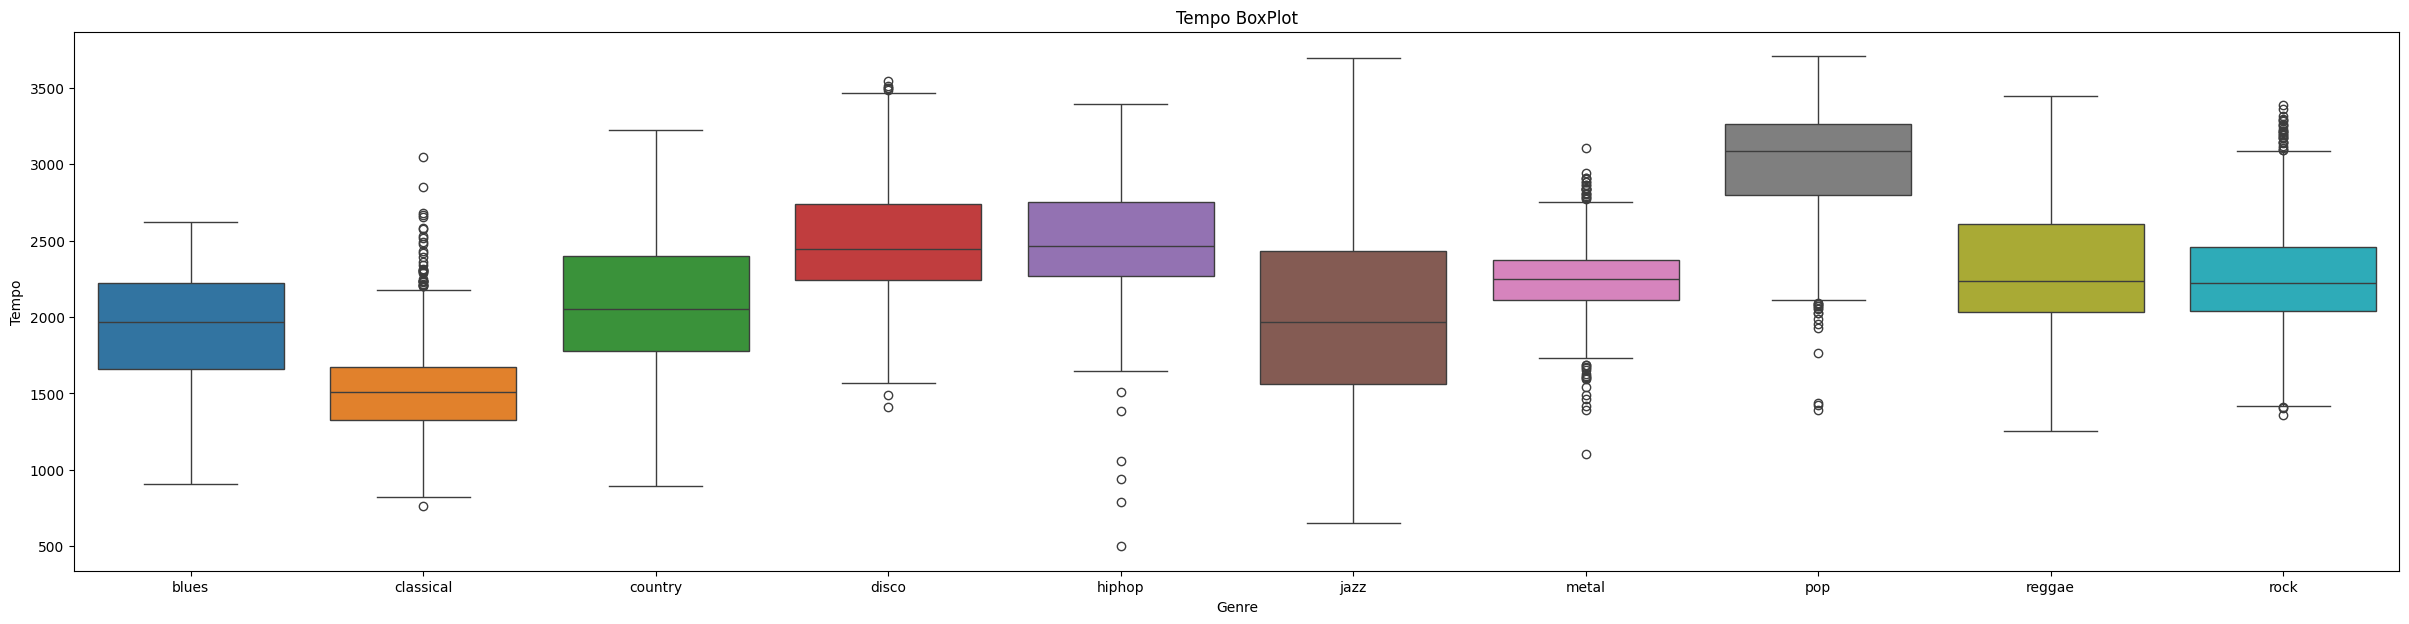

In [23]:
plt.figure(figsize=(30, 7));
sns.boxplot(x = "label", y = "spectral_bandwidth_mean", hue='label', data = music_data[["label", "spectral_bandwidth_mean"]]);
plt.title('Tempo BoxPlot')
plt.ylabel("Tempo")
plt.xlabel("Genre")


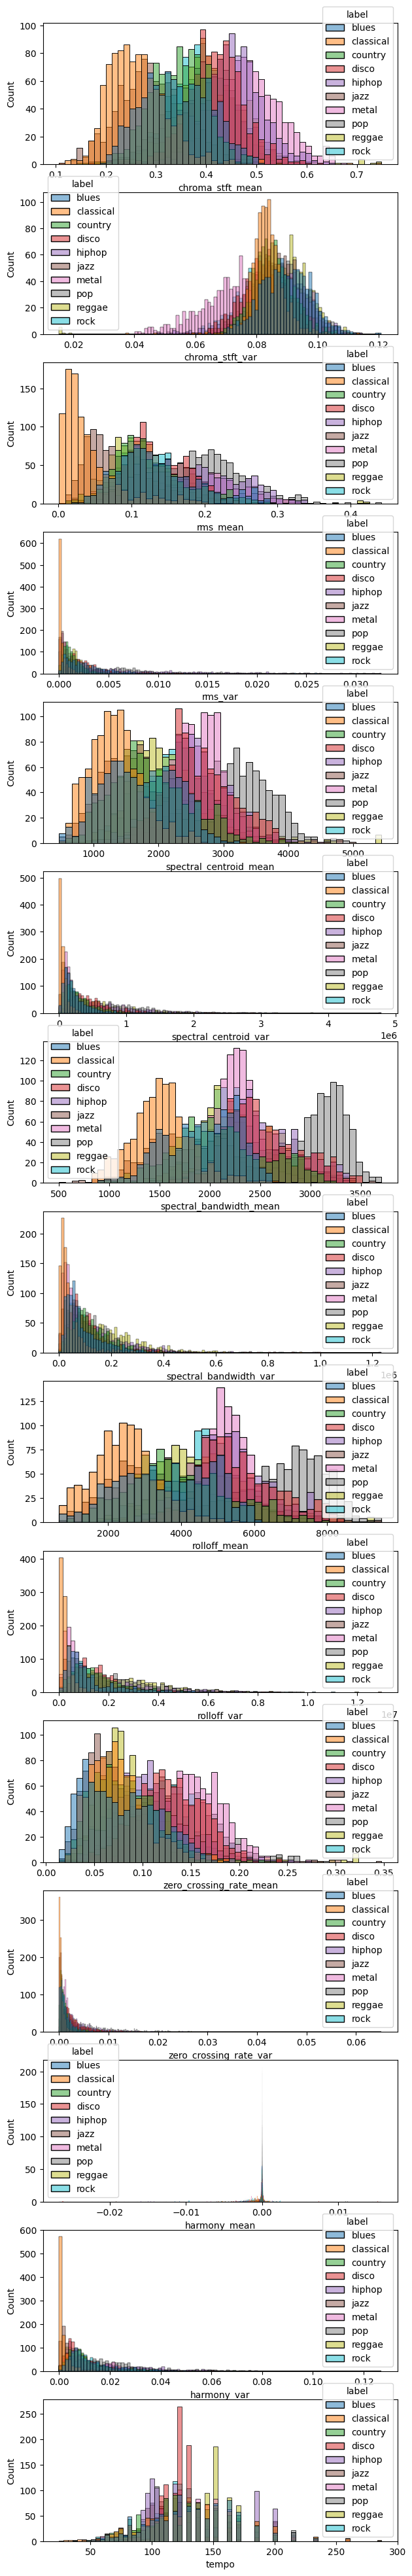

In [18]:
plt.figure(figsize=(7,50))
for i in enumerate(numeric_data.columns):
    plt.subplot(len(numeric_data.columns),1,i[0]+1)
    sns.histplot(data=music_data, x=i[1], hue='label')


<Axes: xlabel='tempo', ylabel='Count'>

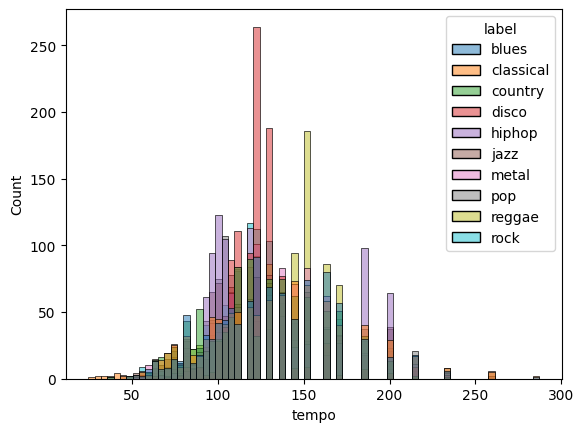

In [22]:
sns.histplot(data=music_data, x='tempo', hue='label')



In [ ]:
plt.figure(figsize=(30, 7));
sns.boxplot(x = "label", y = "rms_mean", data = music_data[["label", "rms_mean"]]);
plt.title('rms_mean BoxPlot')
plt.ylabel("rms_mean")
plt.xlabel("Genre")

In [ ]:
plt.figure(figsize=(30, 7));
sns.boxplot(x = "label", y = "chroma_stft_mean", data = music_data[["label", "chroma_stft_mean"]]);
plt.title('chroma_stft_mean BoxPlot')
plt.ylabel("chroma_stft_mean")
plt.xlabel("Genre")

In [ ]:
plt.figure(figsize=(30,7))
sns.scatterplot(data=music_data, x="spectral_bandwidth_var", y="rolloff_var", hue='label')


In [ ]:
plt.figure(figsize=(7,50))
for i in enumerate(numeric_data.columns):
    plt.subplot(len(numeric_data.columns),1,i[0]+1)
    sns.scatterplot(data=music_data, x="spectral_bandwidth_var", y=i[1], hue='label')


In [ ]:
# music_data = music_data.set_index('label') 

# music_data = music_data.mean(axis=1)

# sns.heatmap(music_data, annot=True)
# label                      0.0
# chroma_stft_mean           0.0
# chroma_stft_var            0.0
# rms_mean                   0.0
# rms_var                    0.0
# spectral_centroid_mean     0.0
# spectral_centroid_var      0.0
# spectral_bandwidth_mean    0.0
# spectral_bandwidth_var     0.0
# rolloff_mean               0.0
# rolloff_var                0.0
# zero_crossing_rate_mean    0.0
# zero_crossing_rate_var     0.0
# harmony_mean               0.0
# harmony_var                0.0
# tempo                      0.0